In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
from pathlib import Path

from IPython.display import display
from HMM_target_detector_20251117 import HMM_target_detector

In [2]:
ANGLE_RANGE = 2*np.pi
CODE_COLOR_MAP = {0 : 'yellow',
                  1 : 'blue',
                  2 : 'purple'}

In [3]:
prob_code0_in_states = np.array([1, 0, 1, 1])
prob_code1_in_states = np.array([0, 1, 0, 0])
EMISSION_MATRIX_TARGET = np.vstack([prob_code0_in_states, prob_code1_in_states])

prob_code0_in_states = np.array([1, 1, 1, 1])
prob_code1_in_states = np.array([0, 0, 0, 0])
EMISSION_MATRIX_NONTARGET = np.vstack([prob_code0_in_states, prob_code1_in_states])

EMISSION_MATRIX_TARGETS = np.stack([EMISSION_MATRIX_TARGET, EMISSION_MATRIX_NONTARGET])
EMISSION_MATRIX_TARGETS, EMISSION_MATRIX_TARGETS.shape

(array([[[1, 0, 1, 1],
         [0, 1, 0, 0]],
 
        [[1, 1, 1, 1],
         [0, 0, 0, 0]]]),
 (2, 2, 4))

In [4]:
prob_code0_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.0, 0.5, 0.5, 0.5])
prob_code1_in_states = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
prob_code2_in_states = np.array([0.5, 0.5, 0.0, 0.5, 1.0, 0.5, 0.5, 0.5])
EMISSION_MATRIX_TARGET1 = np.vstack([prob_code0_in_states, prob_code1_in_states, prob_code2_in_states])

prob_code0_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5])
prob_code1_in_states = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
prob_code2_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 1.0, 0.5])
EMISSION_MATRIX_TARGET2 = np.vstack([prob_code0_in_states, prob_code1_in_states, prob_code2_in_states])

EMISSION_MATRIX_TARGETS = np.stack([EMISSION_MATRIX_TARGET1, EMISSION_MATRIX_TARGET2])
EMISSION_MATRIX_TARGETS, EMISSION_MATRIX_TARGETS.shape

(array([[[0.5, 0.5, 0. , 0.5, 0. , 0.5, 0.5, 0.5],
         [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
         [0.5, 0.5, 0. , 0.5, 1. , 0.5, 0.5, 0.5]],
 
        [[0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0.5],
         [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
         [0.5, 0.5, 0. , 0.5, 0.5, 0.5, 1. , 0.5]]]),
 (2, 3, 8))

In [5]:
prob_code0_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.0, 0.5, 0.5, 0.5])
prob_code1_in_states = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
prob_code2_in_states = np.array([0.5, 0.5, 0.0, 0.5, 1.0, 0.5, 0.5, 0.5])
EMISSION_MATRIX_TARGET1 = np.vstack([prob_code0_in_states, prob_code1_in_states, prob_code2_in_states])

prob_code0_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5])
prob_code1_in_states = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
prob_code2_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 1.0, 0.5])
EMISSION_MATRIX_TARGET2 = np.vstack([prob_code0_in_states, prob_code1_in_states, prob_code2_in_states])

prob_code0_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5])
prob_code1_in_states = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
prob_code2_in_states = np.array([0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5])
EMISSION_MATRIX_TARGET3 = np.vstack([prob_code0_in_states, prob_code1_in_states, prob_code2_in_states])

EMISSION_MATRIX_TARGETS = np.stack([EMISSION_MATRIX_TARGET1, EMISSION_MATRIX_TARGET2, EMISSION_MATRIX_TARGET3])
EMISSION_MATRIX_TARGETS, EMISSION_MATRIX_TARGETS.shape

(array([[[0.5, 0.5, 0. , 0.5, 0. , 0.5, 0.5, 0.5],
         [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
         [0.5, 0.5, 0. , 0.5, 1. , 0.5, 0.5, 0.5]],
 
        [[0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0.5],
         [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
         [0.5, 0.5, 0. , 0.5, 0.5, 0.5, 1. , 0.5]],
 
        [[0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0.5],
         [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
         [0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0.5]]]),
 (3, 3, 8))

In [6]:
agent = HMM_target_detector(emission_matrix_targets=EMISSION_MATRIX_TARGETS)

In [7]:
initial_angle_slider = widgets.IntSlider(
    value=0,  
    min=0,
    max=360,
    description="Initial Angle",
    style={'description_width': 'initial'},
    continuous_update=True,
    layout=widgets.Layout(width="600px"),
)

interactive_plot = widgets.interactive(
    agent.observe_angle_state_pair, initial_angle=initial_angle_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='Initial Angle', layout=Layout(width='600px'), max=360, s…

In [8]:
save_folder = Path(f'../test_trials__detection_model5_20251118_113900_eight_states')
save_folder.mkdir(parents=True, exist_ok=True)

In [9]:
across_trial_params = dict()
across_trial_params['trial_num'] = 0
across_trial_params['max_iter'] = 100
across_trial_params['num_trials'] = 10

across_trial_arrays = dict()
across_trial_arrays['posterior_across_trials'] = np.zeros((across_trial_params['num_trials'], across_trial_params['max_iter']+1, agent.num_beliefs))
across_trial_arrays['expected_forecast_t_across_trials'] = np.zeros((across_trial_params['num_trials'], across_trial_params['max_iter'], agent.candidate_steps.shape[0]))
across_trial_arrays['decision_type_across_trials'] = np.empty((across_trial_params['num_trials'], across_trial_params['max_iter']), dtype=np.dtypes.StringDType())
across_trial_arrays['angles_visited_across_trials'] = np.zeros((across_trial_params['num_trials'], across_trial_params['max_iter']))
across_trial_arrays['steps_taken_across_trials'] = np.zeros((across_trial_params['num_trials'], across_trial_params['max_iter']))
across_trial_arrays['entropy_across_trials'] = np.zeros((across_trial_params['num_trials'], across_trial_params['max_iter']))
across_trial_arrays['time_taken_per_trial'] = np.zeros(across_trial_params['num_trials'])
across_trial_arrays['codes_received_across_trials'] = np.zeros((across_trial_params['num_trials'], across_trial_params['max_iter']))

emission_matrix_true = EMISSION_MATRIX_TARGETS[0]

while across_trial_params['trial_num'] < across_trial_params['num_trials']:

    agent = HMM_target_detector(emission_matrix_targets=EMISSION_MATRIX_TARGETS)
    while agent.within_trial_params["time_ind"]<agent.within_trial_params['max_iter'] and agent.within_trial_params['stopping_num'] < 2:
        if np.isclose(agent.within_trial_arrays['posterior_t'][agent.within_trial_params["time_ind"]-1], 1, atol=1e-2).any() or agent.within_trial_params['stopping_num']>0:
            agent.within_trial_params['stopping_num']+=1

        agent.move_and_sample_from_object()

        agent.update_posterior_and_compute_current_entropy()

        agent.debug_within_trial_print_statements()

        agent.forecast_and_compute_expected_entropy_from_actions()

        agent.compute_expected_entropy_change_from_each_action()
        
        agent.determine_decision_from_forecasted_entropy_change()
        agent.within_trial_params["time_ind"]+=1
    
    summary_df = agent.get_summary_of_trial()
    summary_df.to_csv(f'{save_folder}/trial_{across_trial_params["trial_num"]}.csv')

    across_trial_arrays['posterior_across_trials'][across_trial_params['trial_num'],:agent.within_trial_params["time_ind"]+1,:] = np.vstack([agent.prior_target_prob, agent.within_trial_arrays['posterior_t'][:agent.within_trial_params["time_ind"]]])
    across_trial_arrays['entropy_across_trials'][across_trial_params['trial_num'], :agent.within_trial_params["time_ind"]] = agent.within_trial_arrays['current_entropyS_t'][:agent.within_trial_params["time_ind"]]
    across_trial_arrays['expected_forecast_t_across_trials'][across_trial_params['trial_num'], :agent.within_trial_params["time_ind"],:] = agent.within_trial_arrays['expected_forecast_t_S_per_step'][:agent.within_trial_params["time_ind"]]
    across_trial_arrays['steps_taken_across_trials'][across_trial_params['trial_num'],          :] = agent.within_trial_arrays['steps_taken']
    across_trial_arrays['angles_visited_across_trials'][across_trial_params['trial_num'],       :] = agent.within_trial_arrays['angles_visited']
    across_trial_arrays['codes_received_across_trials'][across_trial_params['trial_num'],       :] = agent.within_trial_arrays['code_received_t']
    across_trial_arrays['time_taken_per_trial'][across_trial_params['trial_num']] = agent.within_trial_params["time_ind"]
    across_trial_arrays['decision_type_across_trials'][across_trial_params['trial_num']] = agent.within_trial_arrays["decision_type_t"]
    across_trial_params['trial_num']+=1

Current angle: 0.0
Code received: 0.0
[0.125      0.125      0.14583333]
P(O1=[0.],S1|T1)=[0.0625 0.0625 0.     0.0625 0.     0.0625 0.0625 0.0625], P(O1=[0.]|T1)=0.375, P(S1|O1=[0.],T1)=[0.17 0.17 0.   0.17 0.   0.17 0.17 0.17], P(T|O1=[0.])=[0.31578947 0.31578947 0.36842105], H1=1.58
P(O1=[0.],S1|T2)=[0.0625 0.0625 0.     0.0625 0.0625 0.0625 0.     0.0625], P(O1=[0.]|T2)=0.375, P(S1|O1=[0.],T2)=[0.17 0.17 0.   0.17 0.17 0.17 0.   0.17], P(T|O1=[0.])=[0.31578947 0.31578947 0.36842105], H1=1.58
P(O1=[0.],S1|T3)=[0.0625 0.0625 0.     0.0625 0.0625 0.0625 0.0625 0.0625], P(O1=[0.]|T3)=0.4375, P(S1|O1=[0.],T3)=[0.14 0.14 0.   0.14 0.14 0.14 0.14 0.14], P(T|O1=[0.])=[0.31578947 0.31578947 0.36842105], H1=1.58
P(O2=0,O1=[0.]|Δθ2,T)=[0.125  0.125  0.1875]
P(O2=0|O1=[0.],Δθ2,T)=[0.33333333 0.33333333 0.42857143]
P(O2=1,O1=[0.]|Δθ2,T)=[0.0625 0.0625 0.0625]
P(O2=1|O1=[0.],Δθ2,T)=[0.16666667 0.16666667 0.14285714]
P(O2=2,O1=[0.]|Δθ2,T)=[0.1875 0.1875 0.1875]
P(O2=2|O1=[0.],Δθ2,T)=[0.5        0

In [11]:
test_df = pd.read_csv(f'{save_folder}/trial_0.csv', index_col=0)
test_df.head(1)

,posterior_t_T1,posterior_t_T2,posterior_t_T3,expected_forecast_t_S_per_step_CW,expected_forecast_t_S_per_step_STAY,expected_forecast_t_S_per_step_CCW,angles_visited,steps_taken,current_entropyS_t,code_received_t,decision_type_t,time_taken
0,0.315789,0.315789,0.368421,1.574534,1.581031,1.574534,0.0,0.785398,1.581031,0.0,random,16.0


In [18]:
trial_num

10

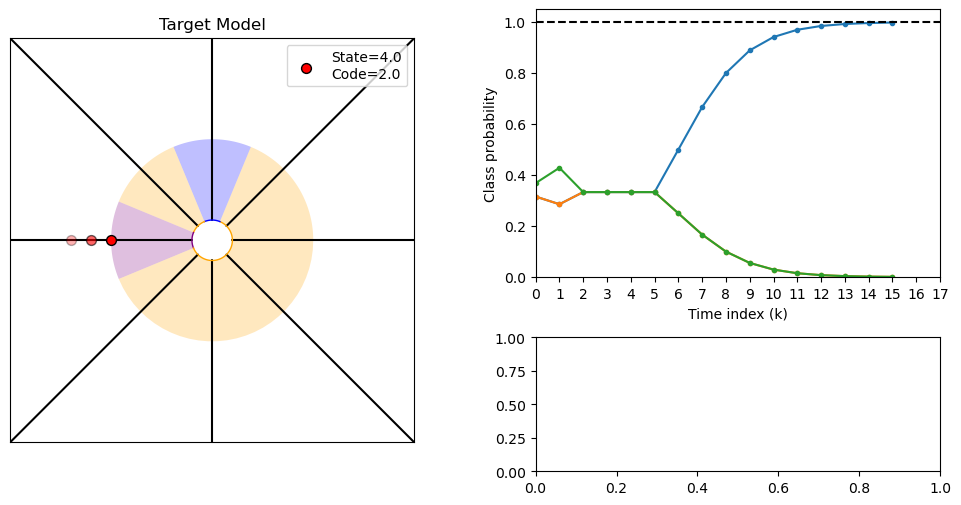

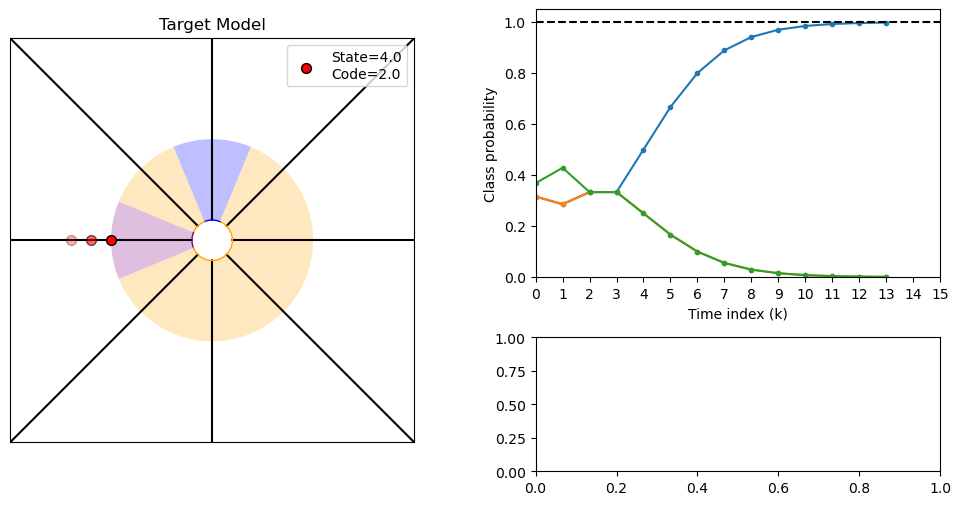

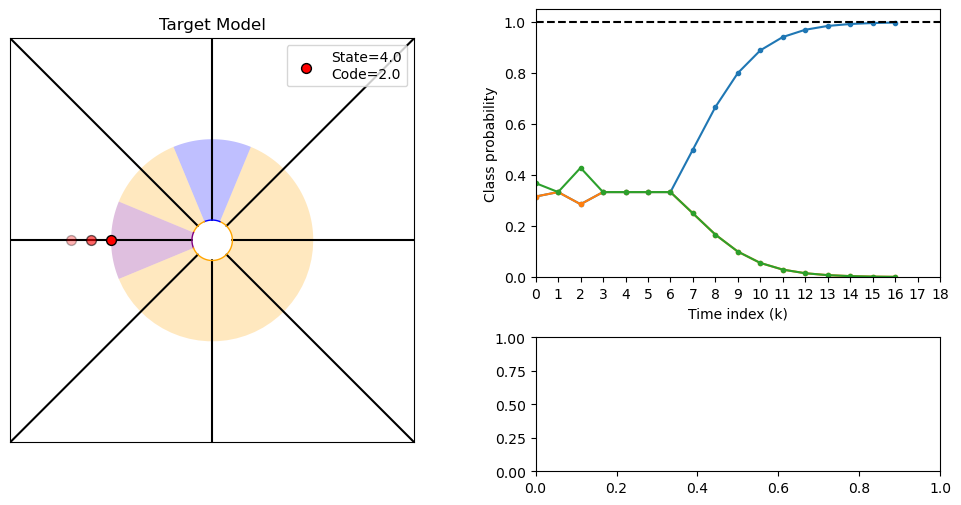

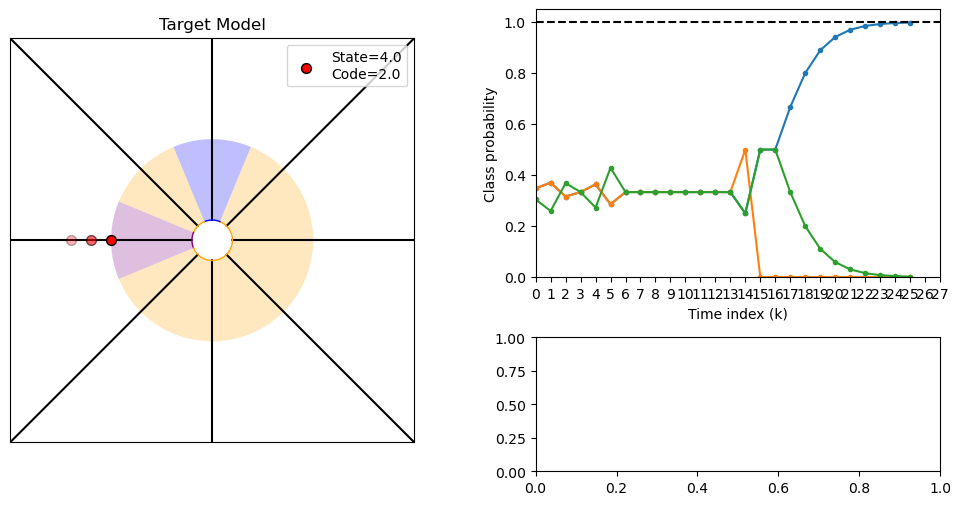

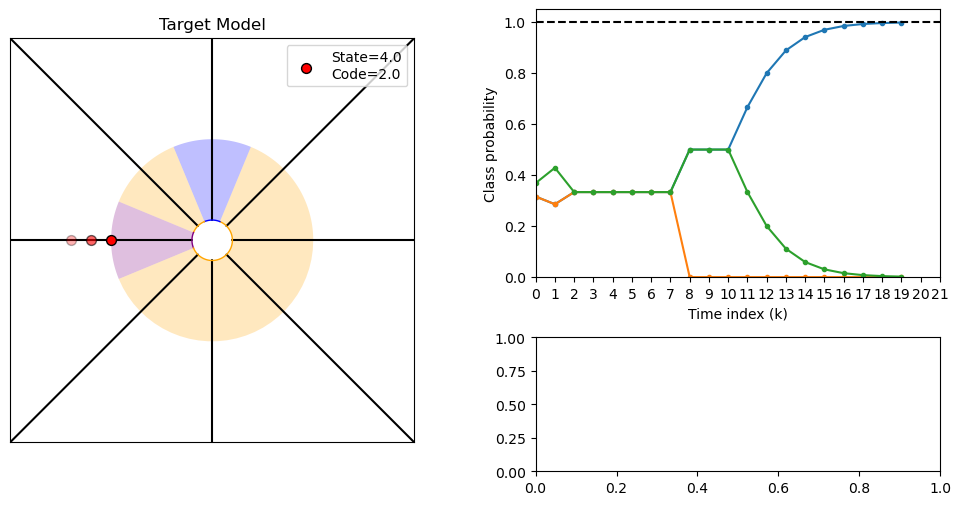

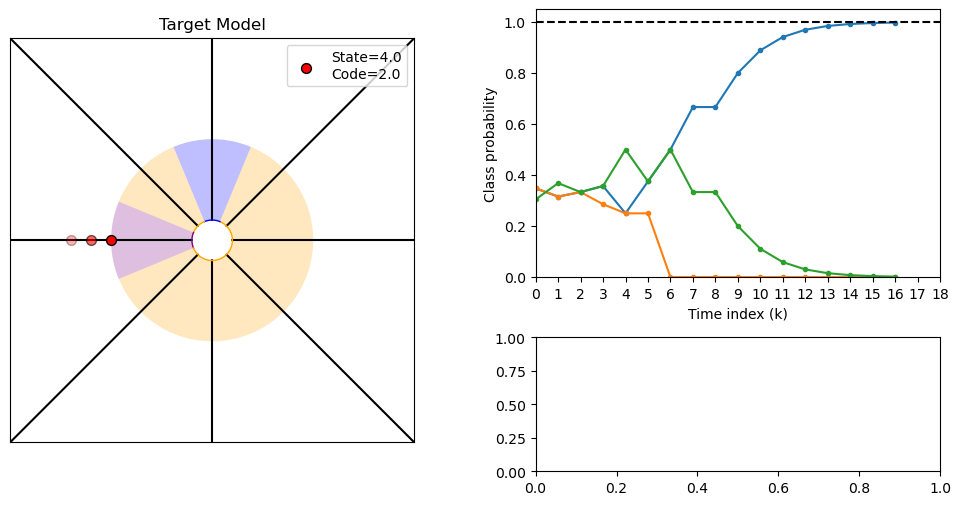

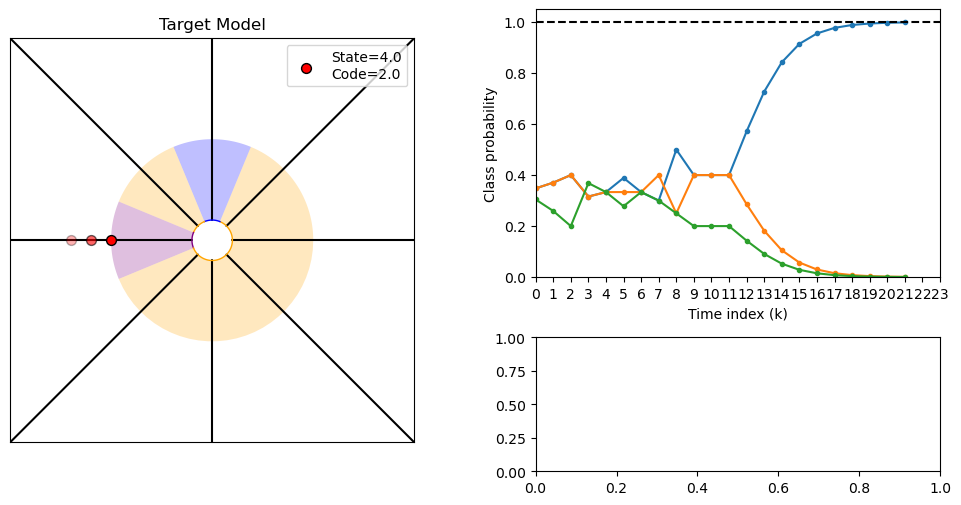

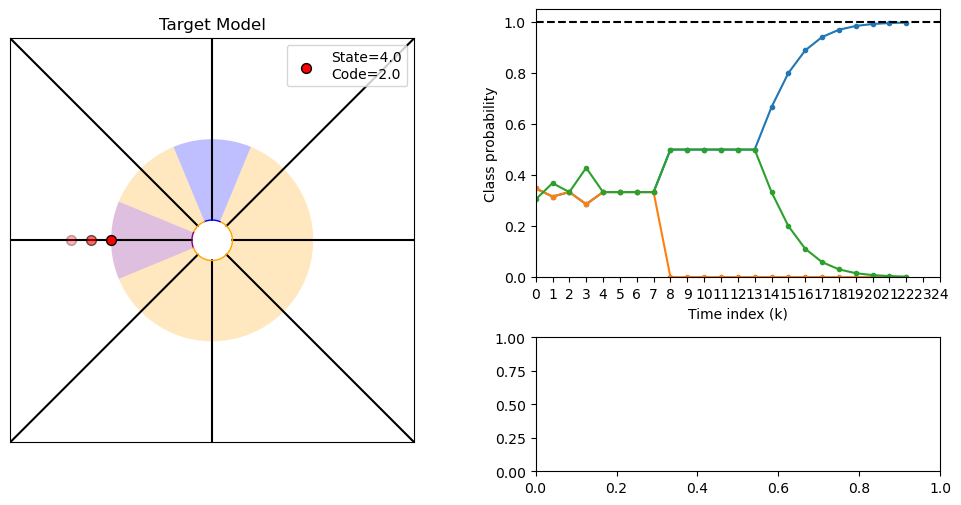

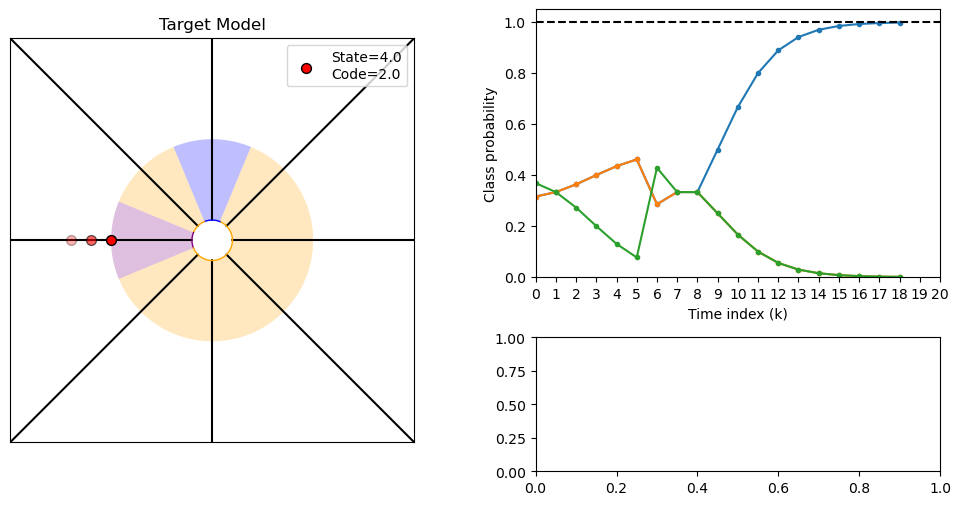

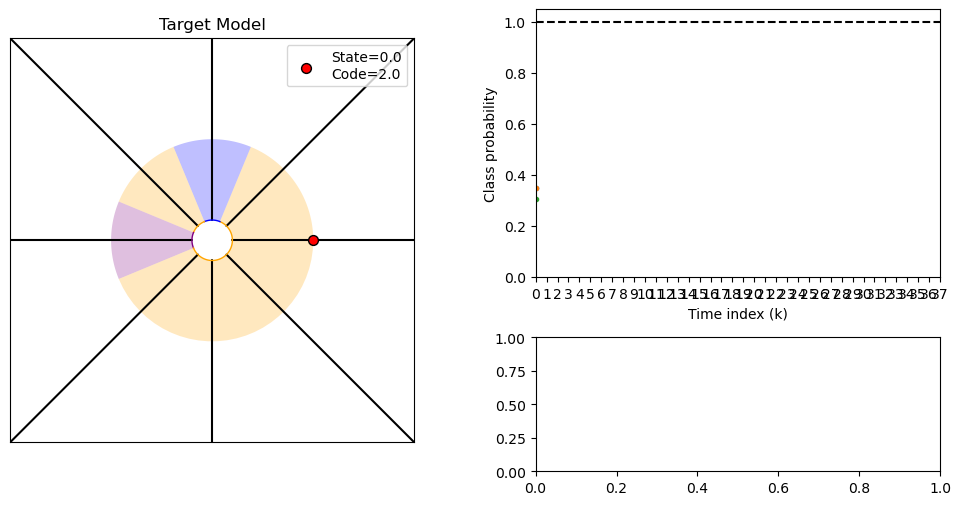

In [22]:
trial_num = 0
num_trials = len(list(save_folder.glob('*.csv')))

while trial_num < num_trials:
    summary_df_for_trial = pd.read_csv(f'{save_folder}/trial_{min(trial_num, num_trials-1)}.csv', index_col=0)

    fig = plt.figure(figsize=(12,6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 4], wspace=0.3) 
    gs_signals = gridspec.GridSpecFromSubplotSpec(
        2, 1, height_ratios=[2,1], subplot_spec=gs[0, 1], hspace=0.3)
    def update(time_ind):
        ax_grid = plt.subplot(gs[0, 0])
        ax_diffusion = plt.subplot(gs_signals[0])
        ax_entropy = plt.subplot(gs_signals[1])
        ax_grid.cla()
        ax_diffusion.cla()
        ax_entropy.cla()

        current_angle = (summary_df_for_trial['angles_visited'][time_ind]%360)
        code_received = summary_df_for_trial['code_received_t'][time_ind]
        initial_radians = np.radians(current_angle)

        setup_details = {'title': 'Target', 'grid_extent': 10, 
                            'inner_radius' : 1, 'outer_radius' : 5,
                            'agent_radians' : initial_radians}
        agent.plot_code_dependent_regions(ax_grid, EMISSION_MATRIX_TARGETS[0], setup_details)
        agent.plot_agent_in_env(ax_grid, setup_details, code_received)

        if time_ind>0:
            prev_angle = (summary_df_for_trial['angles_visited'][time_ind-1]%360)
            initial_radians = np.radians(prev_angle)
            ax_grid.scatter(1.2*setup_details['outer_radius']*np.cos(initial_radians), 1.2*setup_details['outer_radius']*np.sin(initial_radians),
                    s=200, marker='.', facecolor='r', edgecolor='k', alpha=0.6, zorder=4)
            
        if time_ind>1:
            prev_angle = (summary_df_for_trial['angles_visited'][time_ind-2]%360)
            initial_radians = np.radians(prev_angle)
            ax_grid.scatter(1.4*setup_details['outer_radius']*np.cos(initial_radians), 1.4*setup_details['outer_radius']*np.sin(initial_radians),
                    s=200, marker='.', facecolor='r', edgecolor='k', alpha=0.3, zorder=4)

        for i in range(agent.num_beliefs):
            if i == 0:
                class_name = 'target'
            else:
                class_name = 'non-target'
            ax_diffusion.plot(summary_df_for_trial[f'posterior_t_T{int(i+1)}'][:int(time_ind+1)], marker='.', label=f'Class {class_name}')
        ax_diffusion.axhline(y=1.0, linestyle='dashed', color='k')
        ax_diffusion.set_xlim(0, summary_df_for_trial['time_taken'][0]+1)
        ax_diffusion.set_ylim(0.0, 1.05)
        ax_diffusion.set_xticks(np.arange(summary_df_for_trial['time_taken'][0]+2).astype(int))
        ax_diffusion.set_ylabel('Class probability')
        ax_diffusion.set_xlabel('Time index (k)')

        # x_vals = np.arange(max(0, time_ind-2), min(across_trial_arrays['expected_forecast_t_across_trials'].shape[1], time_ind+3)).astype(int)
        # ax_entropy.plot(x_vals, across_trial_arrays['expected_forecast_t_across_trials'][min(trial_num, across_trial_params['num_trials']-1), max(0, time_ind-2):min(across_trial_arrays['expected_forecast_t_across_trials'].shape[1], time_ind+3)], 
        #                 marker='.')
        # ax_entropy.axvline(x=time_ind, linestyle='dashed', color='k', label=f'Decision type:\n{across_trial_arrays["decision_type_across_trials"][min(trial_num, across_trial_params['num_trials']-1), time_ind]}')
        # xlabels = np.arange(time_ind-2, min(across_trial_arrays['expected_forecast_t_across_trials'].shape[1], time_ind+3)).astype(int)
        # ax_entropy.set_xticks(xlabels)
        # ax_entropy.set_ylabel('Forecasted entropy')
        # ax_entropy.legend(loc='lower left')
        # ax_entropy.set_xlabel('Time index (k)')

    ani = animation.FuncAnimation(fig=fig, func=update, frames=int(summary_df_for_trial['time_taken'][0]), interval=1500)
    ani.save(save_folder / f'trial_{min(trial_num, num_trials)}.gif')
    trial_num +=1